## Introduction
In this notebook, we treat a dataset of 25,000 people's Height and Weight as the population.  
We will:
- Explore the population statistics
- Draw random samples
- Demonstrate Central Limit Theorem
- Perform Z-test & T-test
- Visualize results

## 📏 Confidence Interval (CI)

A **Confidence Interval (CI)** is a range of values that is likely to contain the **true population mean** with a given level of confidence.  
Example: For a 95% CI —  
> “We are 95% confident that the true mean lies within this interval.”

---

## 📐 Now We Will Work on Height
We will calculate the **Confidence Interval (CI)** for **height** using both **t-test** and **z-test** methods.

---

### 🔹 t-distribution (when population std. is unknown)

$$
CI = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

---

### 🔹 z-distribution (when population std. is known)

$$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

---

These formulas will be used to calculate the CI for height in our analysis.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('SOCR-HeightWeight.csv')


In [34]:
data.head()


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [35]:
data.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [36]:
pop_heigh = data['Height(Inches)']
sample_heigh = data['Height(Inches)'].sample(100,random_state=42)
print("pop_mean", pop_heigh.mean(), "pop_std", pop_heigh.std())
print("sample_mean", sample_heigh.mean(), "sample_std", sample_heigh.std())

pop_mean 67.99311359679999 pop_std 1.901678771205604
sample_mean 68.1585185 sample_std 2.0986905592563834


## 📊 Z-Test for Height & Weight

We are performing a **z-test** to calculate the **confidence interval (CI)** for height.  

We refer to a **z-table** to find the critical z-value for our confidence level.  

- For a **95% confidence interval** (two-tailed):  
  - α = 1 − 0.95 = 0.05  
  - Split into two tails → α/2 = 0.025  

- Using the **z-table image**, we see:  
  - The cumulative probability corresponding to **z = 1.96** is **0.975 (97.5%)**  
  - This is exactly what we need for a **95% CI** (because 2.5% is left in the upper tail)

✅ **Conclusion:**  
- Positive z-value for 95% CI = **+1.96**  
- Negative z-value = **−1.96**  
- This gives the **range of heights** that contains 95% of the population mean with confidence.

---

### 🖼 Z-Table Reference
![Z-Table](./img/positiveztable.png)


In [37]:
# Z Tets for Height
def Z_test(sample_size, pop_std, confidence_level, sample_mean):
    margin = confidence_level * (pop_std / np.sqrt(sample_size))
    upper = sample_mean + margin
    lower = sample_mean - margin
    return lower, upper

print("CI", Z_test(sample_size=len(sample_heigh), pop_std=pop_heigh.std(), confidence_level=1.96, sample_mean = sample_heigh.mean()))
print("pop_Mean", pop_heigh.mean())

CI (67.7857894608437, 68.5312475391563)
pop_Mean 67.99311359679999


In [38]:
lower, upper = Z_test(sample_size=len(sample_heigh), pop_std=pop_heigh.std(), confidence_level=1.96, sample_mean = sample_heigh.mean())

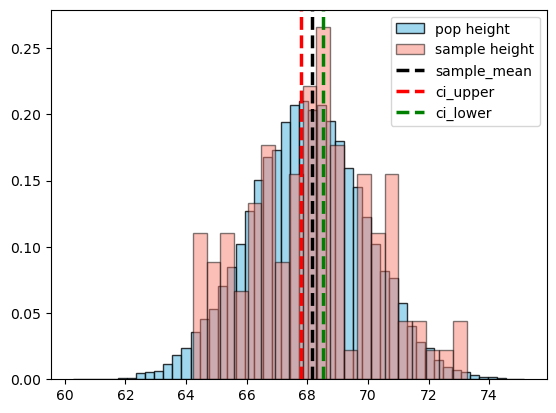

In [39]:
plt.hist(pop_heigh, bins=50, color='skyblue', alpha=0.8, edgecolor = 'black', label='pop height', density=True)
plt.hist(sample_heigh, bins=20, color='salmon', alpha=0.5, edgecolor = 'black', label='sample height', density=True)
plt.axvline(sample_heigh.mean(), color='black', linestyle = '--', linewidth=2.5, label= 'sample_mean')
plt.axvline(lower, color='red', linestyle = '--', linewidth=2.5, label= 'ci_upper')
plt.axvline(upper, color='green', linestyle = '--', linewidth=2.5, label= 'ci_lower')
plt.legend()

In [40]:
# for weights
pop_weight = data['Weight(Pounds)']
sample_weight = data['Weight(Pounds)']

print("CI for weight", Z_test(sample_mean=sample_weight.mean(), sample_size=len(sample_weight),pop_std=pop_weight.std(), confidence_level=1.96))
print("pop mean for weights", pop_weight.mean())

CI for weight (126.93487117701746, 127.22397114458256)
pop mean for weights 127.07942116080001


In [41]:
lower, upper = Z_test(sample_mean=sample_weight.mean(), sample_size=len(sample_weight),pop_std=pop_weight.std(), confidence_level=1.96)

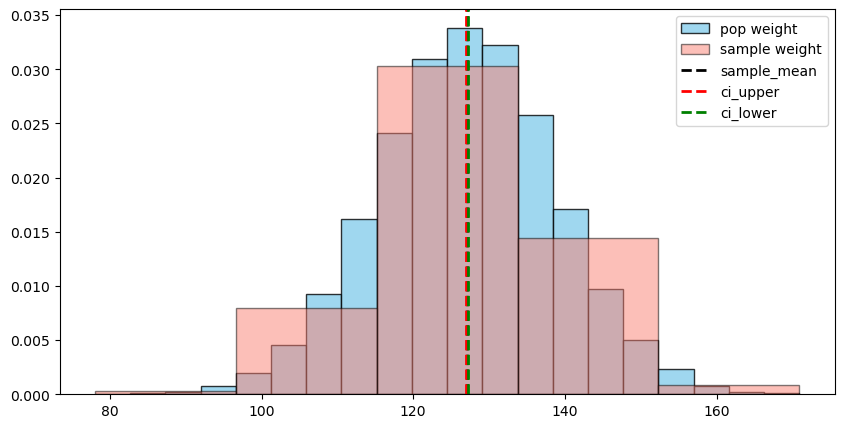

In [42]:
plt.figure(figsize=(10,5))
plt.hist(pop_weight, bins=20, color='skyblue', alpha=0.8, edgecolor = 'black', label='pop weight', density=True)
plt.hist(sample_weight, bins=5, color='salmon', alpha=0.5, edgecolor = 'black', label='sample weight', density=True)
plt.axvline(sample_weight.mean(), color='black', linestyle = '--', linewidth=2, label= 'sample_mean')
plt.axvline(lower, color='red', linestyle = '--', linewidth=2, label= 'ci_upper')
plt.axvline(upper, color='green', linestyle = '--', linewidth=2, label= 'ci_lower')
plt.legend()

## 📊 T-Test for Height & Weight

We are performing a **t-test** to calculate the **confidence interval (CI)** when the **population standard deviation is unknown** or for a **small sample**.  

- For a **95% confidence interval** (two-tailed):  
  - α = 1 − 0.95 = 0.05  
  - Split into two tails → α/2 = 0.025  
- Using the **t-table**, we see:  
  - The critical t-value depends on **degrees of freedom (df = n − 1)**  
  - Example: For a sample of 20 → df = 19 → t ≈ 2.093  

✅ **Conclusion:**  
- Positive t-value for 95% CI = **+2.093**  
- Negative t-value = **−2.093**  
- This gives the **range around the sample mean** where the true population mean is likely to lie.  

---

### 🖼 T-Table Reference
![T-Table](./img/t-table_page-0001.jpg)


In [43]:
from scipy import stats

# Degrees of freedom
df = 99  

# Confidence level
confidence = 0.95  

# alpha/2 for two-tailed test
alpha = 1 - confidence
alpha_2 = alpha / 2

# Compute t-critical value
# We use code because 99 df is not usually listed in standard t-tables
t_critical = stats.t.ppf(1 - alpha_2, df)

print("t-critical value:", t_critical)


t-critical value: 1.9842169515086827


In [44]:
# T-test for Height
def T_test(sample_size, sample_mean, sample_std, confidence_level):
    margin = confidence_level * (sample_std / np.sqrt(sample_size))
    lower = sample_mean - margin
    upper = sample_mean + margin
    return lower, upper
    

In [45]:
T_test(sample_size=len(sample_heigh), sample_mean=sample_heigh.mean(), sample_std=sample_heigh.std(), confidence_level=1.98)

(67.74297776926724, 68.57405923073276)

In [46]:
pop_heigh.mean()

67.99311359679999

In [47]:
# T-test for weight
print(T_test(sample_size=len(sample_weight), sample_mean=sample_weight.mean(), sample_std=sample_weight.std(), confidence_level=1.98))

(126.93339617718293, 127.22544614441709)


In [48]:
pop_weight.mean()

127.07942116080001

In [56]:
df = {'variavle':['weight', 'height'],
      'Population Mean':[pop_weight.mean(), pop_heigh.mean()],
      'Sample Mean':[sample_weight.mean(), sample_heigh.mean()],
      'CI for Lower (Z)':[Z_test(sample_size=len(sample_weight), pop_std=pop_weight.std(), confidence_level=1.96, sample_mean = sample_weight.mean())[0]   ,Z_test(sample_size=len(sample_heigh), pop_std=pop_heigh.std(), confidence_level=1.96, sample_mean = sample_heigh.mean())[0]],
      'CI for Upper (Z)':[Z_test(sample_size=len(sample_weight), pop_std=pop_weight.std(), confidence_level=1.96, sample_mean = sample_weight.mean())[1]   ,Z_test(sample_size=len(sample_heigh), pop_std=pop_heigh.std(), confidence_level=1.96, sample_mean = sample_heigh.mean())[1]],
      'CI for Lower (T)':[T_test(sample_size=len(sample_weight), sample_mean=sample_weight.mean(), sample_std=sample_weight.std(), confidence_level=1.98)[0], T_test(sample_size=len(sample_heigh), sample_mean=sample_heigh.mean(), sample_std=sample_heigh.std(), confidence_level=1.98)[0]],
      'CI for Upper (T)':[T_test(sample_size=len(sample_weight), sample_mean=sample_weight.mean(), sample_std=sample_weight.std(), confidence_level=1.98)[1], T_test(sample_size=len(sample_heigh), sample_mean=sample_heigh.mean(), sample_std=sample_heigh.std(), confidence_level=1.98)[1]]
      }

pd.DataFrame(df)

,variavle,Population Mean,Sample Mean,CI for Lower (Z),CI for Upper (Z),CI for Lower (T),CI for Upper (T)
0,weight,127.079421,127.079421,126.934871,127.223971,126.933396,127.225446
1,height,67.993114,68.158518,67.785789,68.531248,67.742978,68.574059
